In [50]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

In [51]:
# Solution from 4a)

# taken from tutorial
def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)

def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    fft = np.fft.fft2(im)
    fft_shifted = np.fft.fftshift(fft)
    fft_to_visualize = np.log(magnitude(fft_shifted) + 1)
    
    # make kernel back to frequency domain
    fft_kernel_not_shifted = np.fft.ifftshift(fft_kernel)
    product_fft = fft * fft_kernel_not_shifted
    
    product_shifted = np.fft.fftshift(product_fft)
    product_to_visualize = np.log(magnitude(product_shifted)+1)
    
    conv_result = np.fft.ifft2(product_fft).real
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        
        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.imshow(fft_to_visualize)
        
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(fft_kernel, cmap='gray')
        
        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.imshow(product_to_visualize, )
        plt.subplot(1, 5, 5) 
        
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result



(538, 464)
(538, 464)


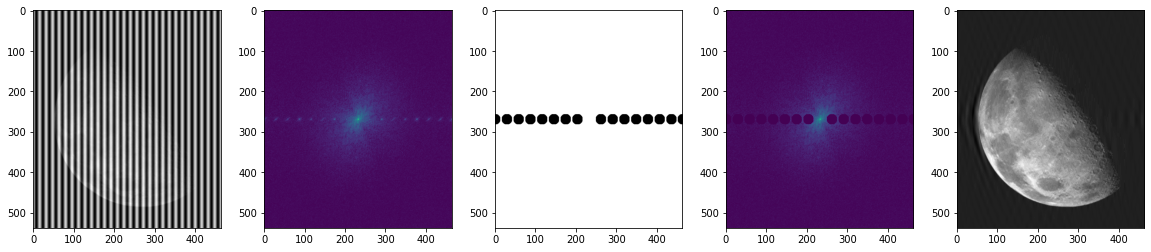

Saving image to: image_processed/moon_filtered.png


In [53]:
if __name__ == "__main__":
    verbose = True
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)
    
    # homemade kernel
    ker = utils.read_im("Noise_kernel_2.png")
    print(ker[:,:,0].shape)
    print(im.shape)
    
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    
    #just for visualization purposes
    fft = np.fft.fft2(im)
    fft_shifted = np.fft.fftshift(fft)
    fft_to_visualize = np.log(magnitude(fft_shifted) + 1)
    im_filtered = fft_to_visualize
    
    im_filtered = convolve_im(im, ker[:,:,0], verbose)
    
    
    if verbose:
        plt.show()

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))